In [1]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
# import csv file
bfs = pd.read_csv(r'C:\Users\Anthony\Downloads\Kaggle_datasets\black_friday_sale.csv', encoding= 'unicode_escape')

In [3]:
bfs.shape

(550068, 12)

In [4]:
bfs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
bfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#check for null values
pd.isnull(bfs).sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
# drop null values
bfs.dropna(inplace=True)

In [8]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
#drop unrelated/blank columns
bfs.drop(['Product_Category_2', 'Product_Category_3'], axis=1, inplace=True)

In [10]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
bfs.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,23959.000000


In [11]:
bfs.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [12]:
# use describe() for specific columns
bfs[['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase']].describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,1.668210e+05,166821.000000,166821.000000,166821.000000,166821.000000
mean,1.003037e+06,8.178886,0.402839,2.742766,11658.114980
std,1.732907e+03,6.487522,0.490470,2.573969,5082.287959
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001523e+06,2.000000,0.000000,1.000000,7869.000000
50%,1.003101e+06,7.000000,0.000000,1.000000,11756.000000
75%,1.004480e+06,14.000000,1.000000,4.000000,15626.000000
max,1.006040e+06,20.000000,1.000000,15.000000,23959.000000


# Exploratory Data Analysis

### Gender

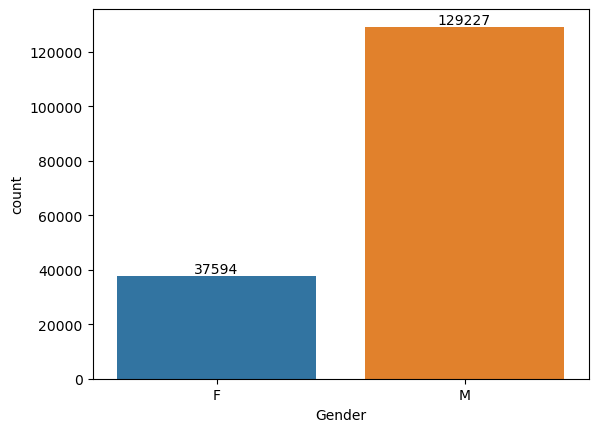

In [13]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = bfs)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

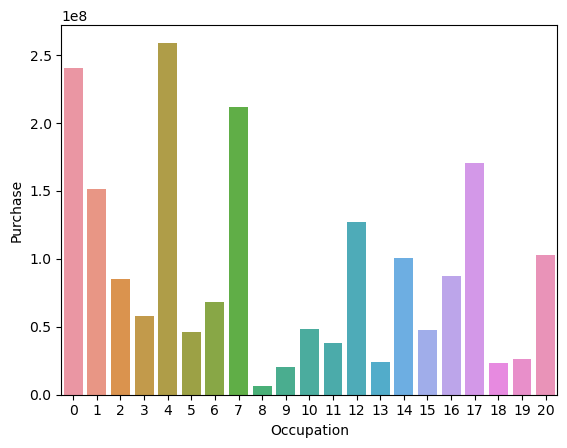

In [14]:
# plotting a bar chart for gender vs total amount

sales_gen = bfs.groupby(['Occupation'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

sns.barplot(x = 'Occupation',y= 'Purchase' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

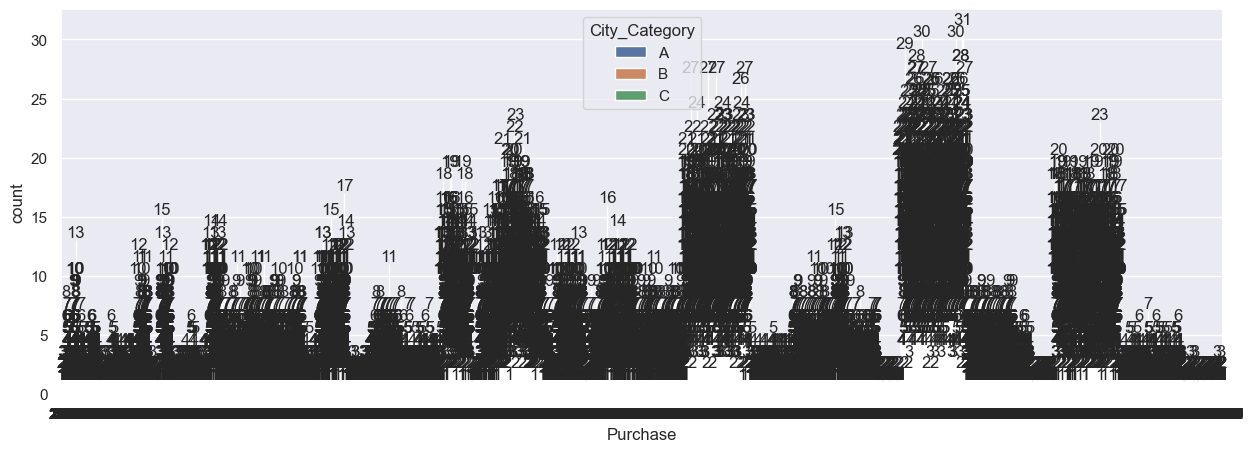

In [25]:
ax = sns.countplot(data = bfs, x = 'Purchase', hue = 'City_Category')

for bars in ax.containers:
    ax.bar_label(bars)

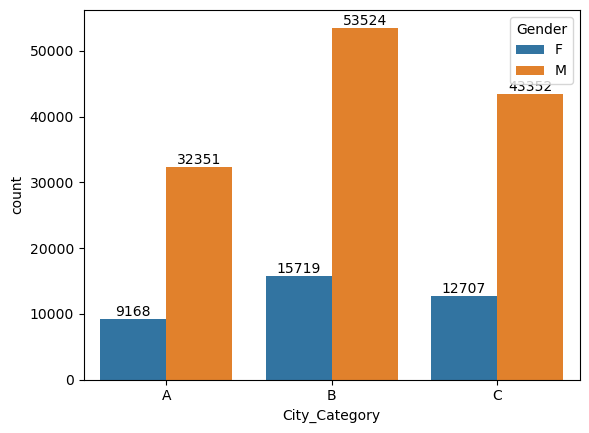

In [17]:
ax = sns.countplot(data = bfs, x = 'City_Category', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

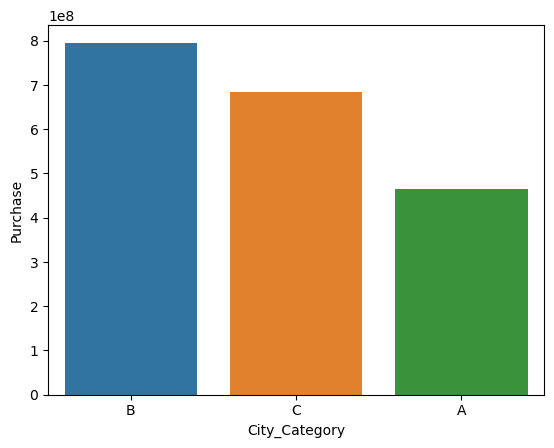

In [17]:
# Total Amount vs Age Group
sales_age = bfs.groupby(['City_Category'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

sns.barplot(x = 'City_Category',y= 'Purchase' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [24]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

NameError: name 'df' is not defined

<Axes: xlabel='State', ylabel='Amount'>

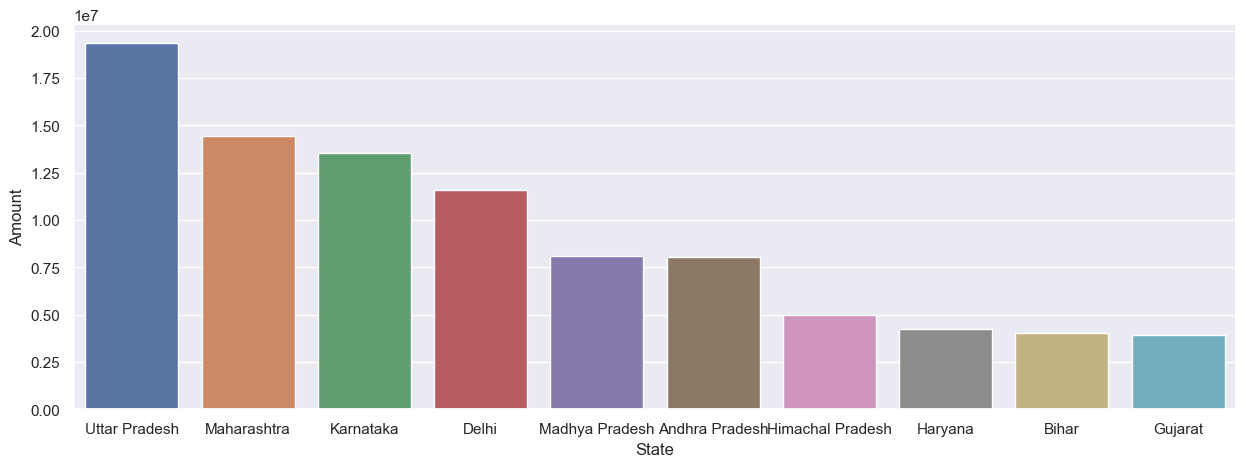

In [20]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [26]:
ax = sns.countplot(data = df, x = 'City_Category')

sns.set(rc={'Marital_Status	':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

NameError: name 'df' is not defined

<Axes: xlabel='Marital_Status', ylabel='Amount'>

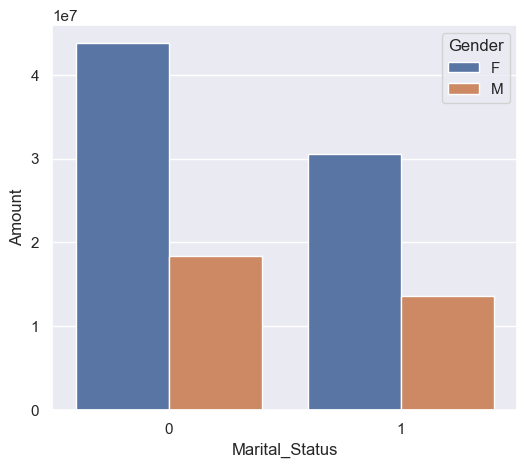

In [22]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [39]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

SyntaxError: invalid syntax (859867972.py, line 1)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

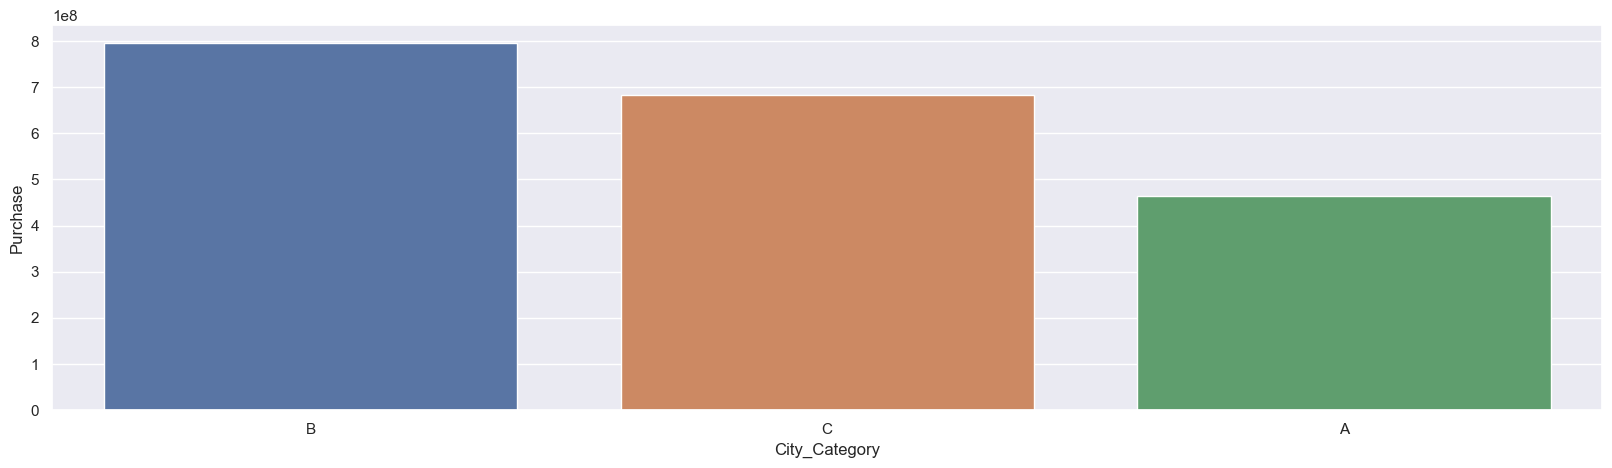

In [27]:
sales_state = bfs.groupby(['City_Category'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'City_Category',y= 'Purchase')

### Product Category

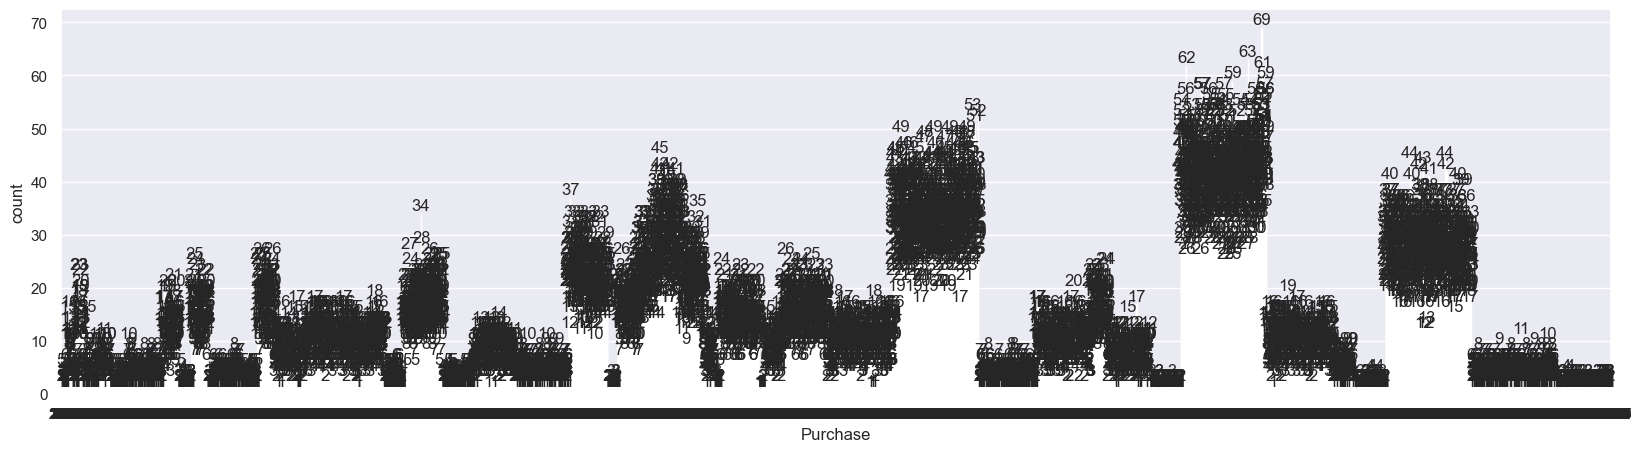

In [29]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = bfs, x = 'Purchase')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_ID', ylabel='Purchase'>

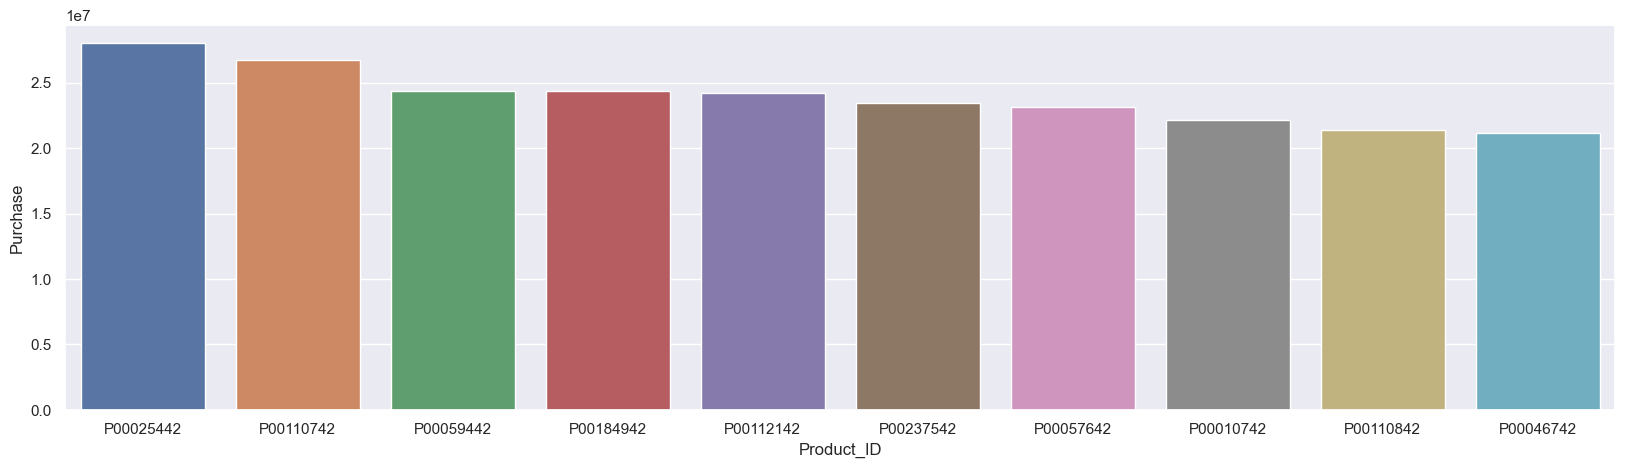

In [31]:
sales_state = bfs.groupby(['Product_ID'], as_index=False)['Purchase'].sum().sort_values(by='Purchase', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Purchase')

<AxesSubplot:xlabel='Product_ID', ylabel='User_ID'>

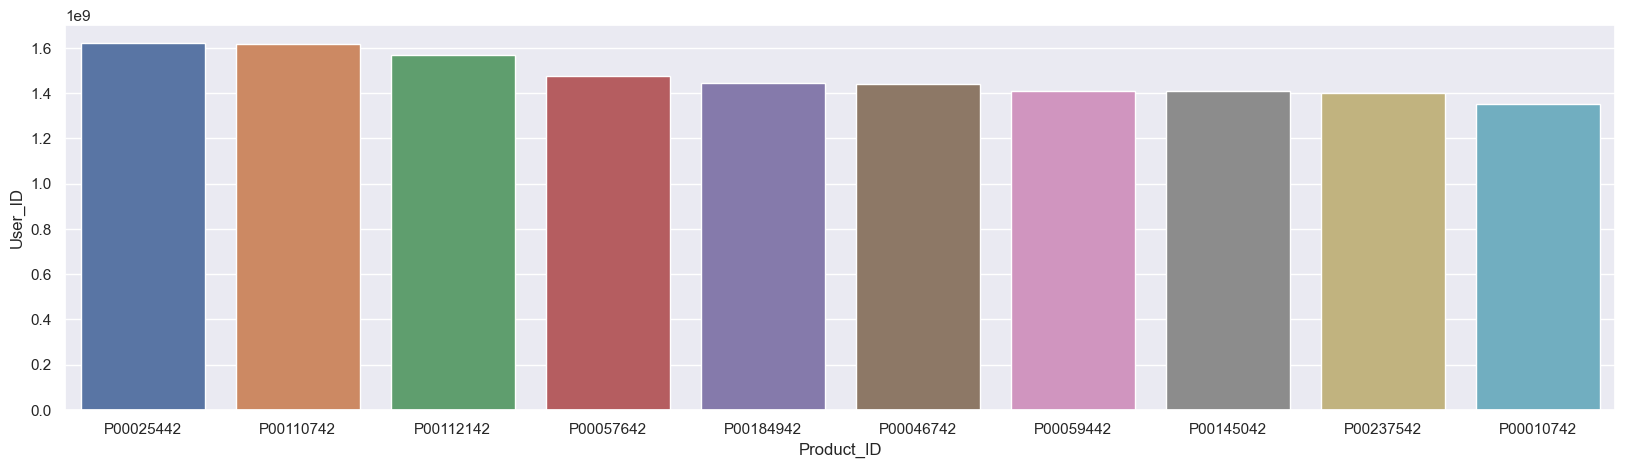

In [34]:
sales_state = bfs.groupby(['Product_ID'], as_index=False)['User_ID'].sum().sort_values(by='User_ID', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'User_ID')

<Axes: xlabel='Product_ID'>

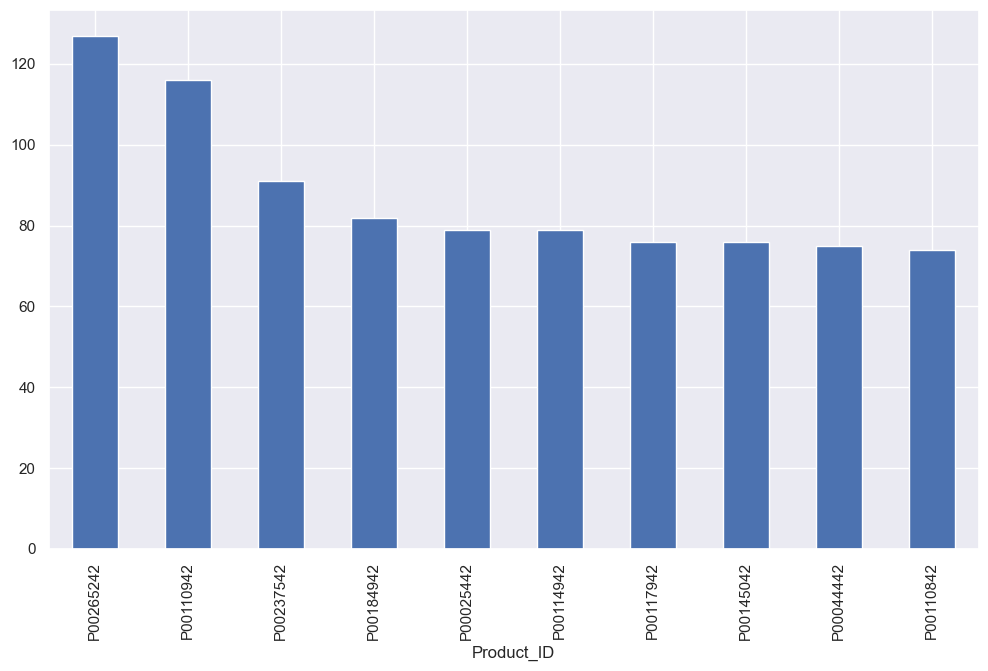

In [28]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

complete project on YouTube: https://www.youtube.com/@RishabhMishraOfficial
    
complete project on GitHub: https://github.com/rishabhnmishra/Python_Diwali_Sales_Analysis

Thank you!